<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Minería de datos

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Scikit-Learn. Parte 1</h2>

## Docentes

 - José Francisco Diez Pastor



<a id="index"></a>
## Tabla de contenidos del notebook

1. [Introducción a Scikit-Learn](#intro)
    - [Cargar Datasets](#cargar)
    - [Entrenando y prediciendo](#entrena_predice)
    - [Persistencia. Guardando modelos para usarlos más tarde](#persistencia)
2. [Aprendizaje Supervisado](#supervisado)
3. [Evaluación de clasificadores y regresores](#evaluacion)
    - [Formas de hacer la evaluación](#formas)
    - [Medidas de rendimiento](#medidas)


In [1]:
%matplotlib inline

Importo lo módulos necesarios para utilizar *widgets* de Jupyter Notebook. Necesarios para proporcionar interactividad al notebook

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Introducción a Scikit-Learn <a id="intro"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Scikit-Learn o Sklearn es la librería básica de minería de datos en Python.

Scikit-Learn es una librería que implementa multitud de algoritmos de minería de datos, preprocesamiento, validación de métodos y visualización.

En general, un problema de aprendizaje considera un conjunto de ejemplos (conjunto de entrenamiento) y a partir de estos trata de predecir propiedades de nuevos ejemplos nunca vistos.

Se pueden separar los problemas de aprendizaje en dos grandes categorías:
- Aprendizaje Supervisado. En el que los datos tienen un atributo especial que se quiere predecir.
    - Clasificación: Los ejemplos pertenecen a un conjunto de dos o más clases. Y queremos aprender a clasificar nuevos ejemplos a partir de los ejemplos del conjunto de entrenamiento. En clasificación tenemos un conjunto discreto y finito de clases.
    - Regresión: El atributo especial o salida que se quiere predecir puede tomar un conjunto continuo de valores.


- Aprendizaje no supervisado. En este caso el conjunto de entrenamiento no tiene un atributo especial o clase que queremos predecir (o si lo tiene lo ignoramos). El objetivo de este tipo de problemas es encontrar grupos de ejemplos con características similares (**clustering**), proyectar los datos en un espacio de 2 ó 3 dimensiones para visualizarlo (**proyeciones**) u otro tipo de tareas para las que no se usa la clase.    



#### Entrenamiento y Test


Es habitual que para evaluar un algoritmo se dividan los datos entre entrenamiento y test. El primero se usa para que el algoritmo aprenda las propiedades de los datos y el segundo para evaluar las propiedades aprendidas.

## Cargar Datasets <a id="cargar"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Scikit-learn viene con un conjunto de datasets, formado por datasets como *iris* o *digit* que son algunos de los datasets más usados para la enseñanza o para evaluar el desempeño de nuevos algoritmos.

Todos los datasets se encuentran en el módulo **sklearn.datasets**. Podemos ver una descripción de ellos en http://scikit-learn.org/stable/datasets/


Un dataset en sklearn es un objeto similar a un diccionario que contiene los siguientes campos:
- data. Un array de tamaño número de ejemplos $\times$ número de atributos.
- target. En el caso de problemas supervisados contendrá la variable objetivo o clase.
- feature_names. Contiene los nombres de los atributos.
- target_names. En el caso de problemas supervisados contiene el nombre de las clases.



In [3]:
from sklearn import datasets

# El dataset iris
iris = datasets.load_iris()
print(iris.data[:10]) # muestro las 10 primeras fílas y columnas
print(iris.target[:10]) # las 10 primeras clases (sus índices)
print(iris.feature_names)
print(iris.target_names)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


A parte de los propios datos que incluyen de ejemplo, se permite cargar cualquier tipo de array de NumPy, matrices de Scipy o DataFrames de Pandas.

### Creando nuestros propios datasets

Para crear nuestro propio dataset solo necesitamos **data** y **target**.

Data ($X$ en notación formal) debe ser una matriz de (número de ejemplos $\times$ número de atributos) y target ($Y$ en notación formal) es una matriz o lista de tamaño igual a número de ejemplos.



In [4]:
import pandas as pd
df=pd.read_csv('iris.csv')

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Necesitamos dividir el dataset en $X$ e $Y$

In [5]:
# eliminando la clase (target) nos quedamos solo con los datos de los atributos
train_data = df.drop(["Class"], axis=1)

# Solo queremos los datos, no nos hace falta el nombre de las columnas o los índices
train_data = train_data.values

train_data[:10] # muestro los 10 primeros por pantalla

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
# Selecciono target (que en esta dataset se llama Class)
target_data = df["Class"].values
target_data[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

## Entrenando y prediciendo <a id="entrena_predice"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

El uso básico de un clasificador en Scikit-learn consiste en:
- Entrenar un clasificador.
- Usar el clasificador para predecir nuevas instancias.

A menudo el algoritmo elegido tendrá parámetros que tendremos que elegir y que en apartados posteriores veremos como se pueden ajustar.


En el caso de una aplicación en producción, se realizaría el entrenamiento (que puede ser una tarea costosa), se guardaría el clasificador (se serializaría) y luego se recupera el clasificador y se despliega en un servidor o aplicación de cualquier tipo
- Usar persistencia para guardar y recuperar un clasificador guardado.

----------------------

En Scikit-learn todos los modelos tanto supervisados como no supervisados se entrenan con el método **fit** 
- En modelos supervisados recibe atributos ($X_{train}$) y clase ($Y_{train}$)
- En modelos no supervisados recibe solo los atributos ($X_{train}$)

Se hacen predicciones con el método **predict** que recibe un array de 2 dimensiones con tantas instancias como se quiera predecir ($X_{test}$).

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)

In [8]:
# Entrenamiento
# X = train_data
# y = target_data
# Los datos del iris cargados anteriormente
forest = forest.fit(train_data, target_data)

In [9]:
# Haciendo la predicción
prediccion = forest.predict([[4.4, 2.9, 1.4, 0.2]])
prediccion

array(['Iris-setosa'], dtype=object)

Atentos a que no recibe una instancia, sino que recibe una lista de instancias, aunque en este caso tenía solo un ejemplo.

In [10]:
import numpy as np
# Observa que se le pasa en realidad un array 2D
# A predict se le pasa un array de instancias, 
# aunque solo queramos predecir una
np.array([[4.4, 2.9, 1.4, 0.2]]).shape

(1, 4)

Se pueden predecir $N$ ejemplos de una sola operación

In [11]:
forest.predict([[4.4, 2.9, 1.4, 0.2],
                [7.,3.2,  4.7,  1.4]])

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

## Persistencia. Guardando modelos para usarlos más tarde <a id="persistencia"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En el caso de una aplicación en producción. Después de entrenar un modelo es recomendable guardarlo para un futuro, para no tener que reentrenarlo cada vez que se quiera usar.

Es posible serializar y deserializar modelos usando la librería por defecto de persistencia de Python: Pickle

- Con **dump** se guarda el objeto que queramos en un determinado fichero.

- Con **load** se recupera un objeto desde un fichero y se almacena en una variable.



In [12]:
import pickle # serializar y deserializar

# Un modelo entrenado con los parámetros óptimos que hayamos determinado
forestDefinitivo = forest.fit(train_data, target_data)

filename = 'randomForest.sav'
#guardamos
pickle.dump(forestDefinitivo, open(filename, 'wb'))


Posteriormente solo tendremos que cargar el clasificador en nuestra aplicación (Una sola vez, al cargar el programa).
Lo cargamos una vez al iniciar el programa y lo usamos siempre que queramos.


La magic de Jupyter ``%%time`` sirve para saber el tiempo que tarda en ejecutarse una celda. Vemos que cargar un modelo es mucho más rápido que entrenarlo nuevamente.

In [13]:
%%time
# cuando arranca la aplicación se carga
# en lugar de re-entrenar recuperamos un modelo guardado en milisegundo
loaded_model = pickle.load(open(filename, 'rb'))

Wall time: 15.6 ms


Posteriormente la aplicación le pasaría instancias al clasificador y este los clasificaría sin problemas.

In [14]:
loaded_model.predict([[4.4, 2.9, 1.4, 0.2]])


array(['Iris-setosa'], dtype=object)

### Consideraciones

Scikit learn proporciona una alternativa a pickle que es mucho más eficiente para trabajar con objetos que contienen una gran cantidad de arrays de NumPy.

```Python
from sklearn.externals import joblib

joblib.dump(clf, 'filename.pkl') 

... 
clf = joblib.load('filename.pkl') 
```

Nunca se debería cargar modelos de una fuente no segura, ya que el modelo podría venir con código malicioso incluido.

Aunque se pueden cargar modelos de una versión en otra, puede ocurrir que modelos de versiones diferentes tengan un comportamiento diferente. Así que es buena idea serializar el modelo incluyendo en algún sitio metadatos sobre el número de versión, como por ejemplo en el nombre del fichero.


In [15]:
from sklearn.externals import joblib

# Un modelo entrenado con los parámetros óptimos y listo para usar
forestDefinitivo = forest.fit(train_data, target_data)

filename = 'randomForest.sav'
#guardamos
joblib.dump(forestDefinitivo,filename)

C:\Users\Vadim Budagov\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['randomForest.sav']

In [16]:
%%time
clf = joblib.load(filename) 

Wall time: 46.8 ms


In [17]:
'''
Tarea 1: Busca en https://scikit-learn.org/stable/datasets/ algún conjunto de datos de clasificación
que sea grande. Pero no tan grande como para tardar toda la clase en hacer el ejercicio.

Usalo para entrenar un sklearn.neighbors.KNeighborsClassifier

Serialízalo y deserializalo primero con Pickle y luego con joblib.

Como el KNeighborsClassifier (k Vecinos más cercanos) almacena todo el conjunto de datos
debería notarse la diferencia de usar un tipo u otro de serialización.

'''




'\nTarea 1: Busca en https://scikit-learn.org/stable/datasets/ algún conjunto de datos de clasificación\nque sea grande. Pero no tan grande como para tardar toda la clase en hacer el ejercicio.\n\nUsalo para entrenar un sklearn.neighbors.KNeighborsClassifier\n\nSerialízalo y deserializalo primero con Pickle y luego con joblib.\n\nComo el KNeighborsClassifier (k Vecinos más cercanos) almacena todo el conjunto de datos\ndebería notarse la diferencia de usar un tipo u otro de serialización.\n\n'

# Aprendizaje Supervisado <a id="supervisado"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


El aprendizaje supervisado consiste en aprender la relación entre dos arrays de datos:
- Los datos observados ($X$), los atributos que describen un determinado individuo o fenómeno.
- Los datos que tratamos de predecir ($y$), el *target* o etiqueta. Que generalmente es un array de una dimensión de tamaño igual a número de ejemplos.

Todos los algoritmos de aprendizaje supervisado implementan un método **fit(X,y)** que entrena el modelo y un método **predict(X)** que dado un nuevo conjunto de obserbaciones $X$ devuelve precicciones de sus posibles valores $y$.

En clasificación la $y$ debe de ser un conjunto finito de etiquetas.
 - En el caso de Sklearn las etiquetas en clasificación pueden ser enteros o strings.
En regresión la $y$ es un conjunto continuo de valores, generalmente floats o doubles.

----------------

### Frontera de decisión 

En un problema de clasificación, la frontera de decisión es una hipersuperficie (una superficie es en 3 dimensiones, una hipersuperficie es en $N$ dimensiones) que divide los datos en varios conjuntos, cada conjunto formado por los ejemplos predichos para cada una de las clases.

El clasificador va a clasificar los ejemplos como pertenecientes a una de las clases, aquellos casos dudosos estaran pegados a la frontera de decisión.

Si la frontera de decisión es un hiperplano, entonces decimos el clasificador es lineal. 

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def visualizar_clasificador(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Muestra las instancias del conjunto de entrenamiento, sus dos primeras dimensiones.
    # scatter sirve para dibujar puntos. c es el color y s el tamaño (size)
    # el color se determina de acuerdo a un colormap (mapa de color)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # construye el modelo (ej árbol de decisión)
    model.fit(X, y)
    
    # crea un conjunto de datos artificial uniformemente distribuido en rejilla
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    # predice las clases del conjunto de datos artificial
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Utiliza los valores y clase del conjunto artificial en rejilla
    # para crear un diagrama de contornos
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Dimensiones de X (300, 2)


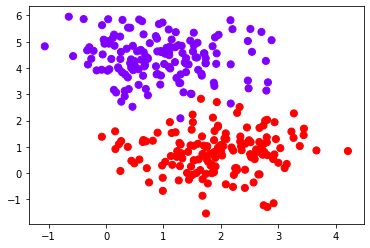

In [19]:
# make_blobs permite crear nubes de puntos de forma esférica
from sklearn.datasets import make_blobs

'''
Creando datos de prueba para los ejemplos
Crea 2 nubes de puntos, de 300 puntos en total
Las nubes están dispersas con una desviación de 0.75 (ese número concentra o expande los puntos)
'''
X, y = make_blobs(n_samples=300, centers=2,
                  random_state=0, cluster_std=0.8)

print("Dimensiones de X",X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

### Un ejemplo de clasificador lineal: Regresión Logística

Regresión Logistica es un modelo lineal, lo que significa que no será capaz de funcionar correctamente en aquellos casos en los que la frontera de decisión entre las clases no sea lineal.

A grandes rasgos, el método lo que hace es encontrar un hiperplano que separa las dos clases.

El hiperplano que separa las clases se puede definir con la fórmula de la recta o el plano pero extrapolada a $N$ dimensiones.


$h_\beta(X) = \beta_1 \times X_1 + \beta_2 \times X_2 \ldots \beta_n \times X_n$


Probabilidad de que X pertenezca a la clase 1 = $ \frac{1}{1+ \text{exp} (h_\beta(X))} $


Probabilidad de que X pertenezca a la clase 0 = $ 1 - \frac{1}{1+ \text{exp} (h_\beta(X))} $


Los $\beta$ optimos se encuentran en el proceso de aprendizaje con un algoritmo de optimización como lo puede ser el descenso del gradiente. Es la versión de clasificación del algoritmo de regresión lineal.

C:\Users\Vadim Budagov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


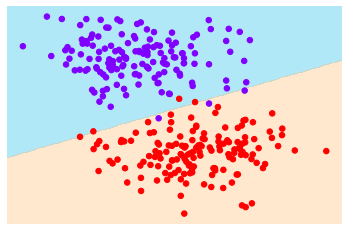

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

visualizar_clasificador(lr, X, y)

### Un ejemplo de clasificador no lineal: Vecinos más cercanos

El algoritmo de vecinos más cercanos es un ejemplo de aprendizaje basado en instancias, no es un algoritmo que aprenda a generalizar. No construye un modelo, sino que simplemente almacena las instancias del conjunto de entrenamiento.

La predicción se realiza por votación simple de los vecinos más cercanos, se asigna la clase más representada entre los vecinos más cercanos de un determinado ejemplo a predecir.

Este algoritmo depende del parámetro $k$ (número de vecinos), el valor óptimo de este parámetro es altamente dependiente de cada conjunto de datos.

Aunque por lo general a mayor es el valor de $k$ más suave es la frontera de decisión y menos susceptible es al ruido.


In [21]:
from sklearn.neighbors import KNeighborsClassifier

def plot_knn(k=3):

    knn = KNeighborsClassifier(n_neighbors=k)
    visualizar_clasificador(knn, X, y)


interact(plot_knn, k=(1,35,2)); 

interactive(children=(IntSlider(value=3, description='k', max=35, min=1, step=2), Output()), _dom_classes=('wi…

In [22]:
'''
Tarea 2:

Piensa en los algoritmos de clasificación del temario a ver si hay alguno que tenga 
fronteras de decisión con una forma rectilínea, es decir, que divida los datos con cortes
perpendiculares a los ejes.

Usa los ejemplos anteriores para visualizar el resultados

'''

'\nTarea 2:\n\nPiensa en los algoritmos de clasificación del temario a ver si hay alguno que tenga \nfronteras de decisión con una forma rectilínea, es decir, que divida los datos con cortes\nperpendiculares a los ejes.\n\nUsa los ejemplos anteriores para visualizar el resultados\n\n'

### Un ejemplo de algoritmos de regresión:  Regresión Lineal

Regresión lineal es el punto de partida para regresión, es el primer algoritmo que debemos probar.

Es un método rápido y fácil de interpretar.

Aunque tiene la limitación de que no puede ajustarse correctamente cuando la relación entre los atributos y la variable a predecir no es lineal.


In [23]:
import pandas as pd
# https://github.com/justmarkham/DAT3
# Cargar los datos como un dataframe (desde internet)
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 3


En este conjunto de datos se tiene como atributos la cantidad gastada en publicidad en cada uno de los distintos tipos de medios de comunicación.

Y la clase son las ventas en millones de dolares del producto anunciado (sales).



In [ ]:
# obtengo los nombres de las columnas del dataframe
atts = data.columns

In [ ]:
# Visualización entre los atributos y el valor a predecir
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x=atts[0], y=atts[3], ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x=atts[1], y=atts[3], ax=axs[1])
data.plot(kind='scatter', x=atts[2], y=atts[3], ax=axs[2])

Nos interesa por una parte ser capaces de predecir el efecto de nuestra inversión (que ventas podriamos tener en función de lo que invirtamos) y también **interpretar** el modelo y comprender que medio es el que afecta más a las ventas

In [ ]:
# El conjunto de entrenamiento X los atributos 'TV', 'Radio' y 'Newspaper'
feature_cols = atts[:3]
X = data[feature_cols]
# y van a ser las ventas
y = data[atts[3]]

# Se importa LinearRegression y se entrena con fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)



In [ ]:
#Obtenemos la predicción del primer ejemplo

# ejemplo es la primera instancia
ejemplo = X.iloc[0]
tv = ejemplo[0]
radio = ejemplo[1]
periodico = ejemplo[2]
print(ejemplo)
# predicción con el modelo
lm.predict([[tv,radio,periodico]])

In [ ]:
# Accedemos a los coeficientes de cada uno de los atributos y al término independiente

print("Término independiente ",lm.intercept_)
print("Coeficientes")
list(zip(feature_cols, lm.coef_))


El conjunto de datos nos dice que la inversión que influye más en las ventas es la radio, y vemos que la publicidad en prensa escrita no tiene influencia o es negativa.

El significado de los coeficientes es equivalente al de los coeficientes en regresión logística.

In [ ]:
# obtenemos la interpretación
tv*lm.coef_[0]+radio*lm.coef_[1]+periodico*lm.coef_[2]+lm.intercept_

In [ ]:
'''
Tarea 3:

Crea un conjunto de datos aleatorio (con numpy) de 3 columnas y 100 filas.
Crea un array de 1x100 que sea una combinación lineal de las 3 columnas del conjunto anterior
ej: y = 2*c1+ 4*c2 -3c3 +5

Entrena un modelo de regresión lineal y observa como los coeficientes se ajustan a
los datos que has inventado

'''

----------------------
# Evaluación de clasificadores y regresores <a id="evaluacion"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Para la evaluación de un modelo hay que entrenar dicho modelo con un conjunto de entrenamiento. Posteriormente, usando un conjunto de test, hay que comparar las predicciones realizadas con el valor real.


```Python
from sklearn.metrics import accuracy_score

# accuracy significa exactitud (es la tasa de acierto)
# esta función devuelve un número entre 0 y 1. 
# 0 Todas las predicciones erroneas, 1 todas correctas
accuracy_score(y_real, y_predicha)
```

## Formas de hacer la evaluación <a id="formas"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Habitualmente los datos de los que disponemos no son ilimitados, por lo que debemos usar los datos disponibles tanto para entrenar como para evaluar el modelo.

### Forma incorrecta, usando el propio conjunto de entrenamiento

La forma incorrecta de evaluar un clasificador sería usando el propio conjunto de entrenamiento.

In [ ]:
from sklearn import datasets

# El dataset iris
iris = datasets.load_iris()

X = iris.data
y = iris.target

Por ejemplo, si usamos el vecinos más cercanos con  *n_neighbors*=1.

Este clasificador recordemos que almacenaba en su interior el conjunto de entrenamiento. 

Si se predice con los mismos ejemplos que se han usado para entrenar, el vecino más cercano de cada ejemplo será el mismo.

Es decir, el ejemplo más cercano de la instancia número 27, será la propia instancia número 27 y así con todas salvo que haya ejemplos duplicados.

![Vecinos más cercanos wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png "Vecinos más cercanos wikipedia")
**Vecinos más cercanos. Wikipedia **

In [ ]:
'''
Entrenamos el modelo con X y obtenemos las predicciones también con X.
'''
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
# y_model son las clases predichas por el modelo
y_model = model.predict(X)

Si comparamos las predicciones con las etiquetas reales vemos que coinciden a la perfección. Pero no estamos evaluando el modelo correctamente porque hemos usado para test las mismas instancias que en entrenamiento.

Un clasificador sencillo como vecinos más cercanos tendrá un 100% de acierto con esta forma erronea de evaluar

In [ ]:
from sklearn.metrics import accuracy_score

'''
accuracy_score devuelve los valores entre 0 y 1
Un valor de 1 es equivalente a un 100% de acierto.
'''

accuracy_score(y, y_model) 

### Una forma un poco más correcta: División en entrenamiento y test.

Una forma más apropiada es dividir el conjunto de datos en entrenamiento y test.
El método **train_test_split** del módulo **sklearn.model_selection** (modulo sklearn.cross_validation en las versiones antiguas) recibe los datos $X$, las etiquetas de las clases $y$, una proporcion (entre 0 y 1) de entrenamiento y una semilla aleatoria.

Y devuelve $X$ e $y$ divididos en 2 subconjuntos cada uno, la proporción del conjunto de entrenamiento respecto al total se especifica en **train_size**.

Más opciones sobre este método en el material adicional.

In [ ]:
from sklearn.model_selection import train_test_split
# divide los datos. X_train será el 60% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                   train_size=0.6) # 0.6, el 60% de los datos para entrenamiento

# Entrena el modelo con el 60% de los datos
model.fit(X_train, y_train)

# Evalua el modelo con el 40% restante
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

Utilizando un conjunto de entrenamiento y otro de test tenemos una estimación más realista del acierto de nuestro modelo, pero aún no es lo mejor que podemos hacer.

## Cross Validation

Una desventaja de usar la descomposición en entrenamiento y test es que los datos que hemos usado para entrenar el modelo nunca los usamos para hacer el test y viceversa. Si tenemos pocos datos esto puede ser un problema.

Y podriamos estar seleccionando para test un subconjunto que sea especialmente fácil de clasificar o viceversa.

Una manera de solucionarlo es la validación cruzada:
- Primero se usa una partición para entrenamiento y luego esa misma partición para test.
- El rendimiento del clasificador es la media de los rendimientos para cada una de las particiones

In [ ]:
# Atención a que por el momento estoy usando el mismo método pero con 0.5 de train_size
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                   train_size=0.5)


y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
aciertos = accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

# tengo 2 modelos, tengo dos tasas de acierto y hago la media
print(aciertos)
print(np.array(aciertos).mean())

### N-folds Cross Validation

En la celda anterior se han obtenido dos porcentajes de acierto. Se puede hacer la media entre ellos y se obtiene una mejor estimación del error que solamente con una partición. Esto se llama 2-folds cross validation.

Esta misma idea se puede ampliar a más folds (más particiones). Por ejemplo con 4 folds, se usaría el 75% del conjunto de datos como entrenamiento y el 25% restante para test y esto mismo se repetiría 4 veces siendo el fragmento de test cada vez un fragmento diferente.

![Wikipedia. Validación Cruzada](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Esquema_castell%C3%A0.jpg/800px-Esquema_castell%C3%A0.jpg)
** Wikipedia. Validación cruzada con 4 folds**




En Sklearn para hacer los visto en la figura se usa la función **cross_val_score**

Ejemplo con 4 folds.

In [ ]:
from sklearn.model_selection import cross_val_score

# model recordemos que sigue siendo el algoritmo de Vecinos más cercanos
scores = cross_val_score(model, X, y, cv=4)
scores

In [ ]:
# mostrando el accuracy (tasa de acierto) medio y su desviación
# Usando formateo de texto
print("Acierto: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# Sin usar formateo de texto
print("Acierto: ",scores.mean(), "(+/- ",scores.std() * 2,")")

#### Stratified k-fold

**StratifiedKFold** es una variante de k-fold en donde en cada partición se tiene aproximadamente la misma proporción de instancias de cada clase que la proporción que teniamos en el conjunto completo.

Ejemplos de validación cruzada estratificada, con un dataset de 15 ejemplos en dos clases desequilibradas.

En el ejemplo tenemos que hay más ejemplos de la clase 1 que de la clase 0, con la **StratifiedKFold** esa proporción entre clases se refleja tanto en el entrenamiento como en el test en todas las particiones.
De otra manera el particionamiento sería aleatorio y no se tendrian porque mantener las proporciones.

Este particionamiento es apropiado en conjuntos de datos desquilibrado, en los que tenemos muchos más ejemplos de una clase que de otra. Con el modo aleatorio, en alguna partición podría haber muy pocos ejemplos en entrenamiento o test y la precicción podría no ser realista (ej solo hay uno en test y lo acierta 100% de acierto)

Por defecto el método **cross_val_score** hace partición $k$ fold estratificada.

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

labels = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_array = np.array(labels)
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(labels, y_array):
    print("Indices %s %s" % (train, test))
    print("valores %s %s" % (y_array[train], y_array[test]))

In [ ]:
'''
Si no hacemos la cross-validación estratificada vemos que 
en algunas particiones a lo mejor la clase minoritaria no aparece
en la parte de entrenamiento o de test.
'''

from sklearn.model_selection import KFold
import numpy as np

labels = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_array = np.array(labels)
kf = KFold(n_splits=3)
for train, test in kf.split(labels, y_array):
    print("Indices %s %s" % (train, test))
    print("valores %s %s" % (y_array[train], y_array[test]))

Más formas de particionar los datos para hacer la evaluación en el material adicional.

------------------------------------

#### Obteniendo predicciones en lugar de scores

Con la función **cross_val_score** obtenemos una serie de medidas de precisión obtenidas mediante validación cruzada, pero de manera equivalente podemos obtener las predicciones de cada elemento.

La función **cross_val_predict** devuelve la predicción de cada una de las instancias usadas para test, usando validación cruzada.

Podemos pensar que esto no sirve para nada, dado que podemos obtener el porcentaje de acierto directamente, pero luego veremos que puede servir para sacar informes y matrices de confusión.

También, si queremos obtener muchas medidas diferentes, podemos hacerlo simplemente obteniendo las predicciones y usando estas predicciones para calcular tantas medidas como se quiera (Más adelante cuando veamos que hay más medidas de evaluación hay un ejemplo). 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(model, X, y, cv=5)
print("Predicciones de cada instancia ",predicted)

'''
despues hago con las predicciones lo que quiera 
como calcular el accuracy
'''

print("accuracy, porcentaje de acierto")
print(metrics.accuracy_score(y, predicted) )


## Medidas de rendimiento <a id="medidas"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Hasta ahora hemos visto que la validación cruzada es la mejor forma de evaluar un clasificador o un regresor. Y que hay una función llamada **cross_val_score** que nos devuelve la evaluación del clasificador.

Pero ¿que devuelve? tasa de acierto?, error absoluto?, error relativo?

Por defecto la función **cross_val_score** utiliza el método **score()** del modelo que estemos evaluando.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=4)
scores

In [ ]:
# Vemos que en el caso de knn devuelve el accuracy
print(knn.score.__doc__)

Por defecto los clasificadores suelen devolver el *accuracy* o tasa de acierto.

Los regresores suelen devolver el coeficiente de determinación, $R^2$. Que se define como:

```Python
u = ((y_true - y_pred) ** 2).sum() 
v = ((y_true - y_true.mean()) ** 2).sum()

coef_determinacion = (1 - u/v)
```

Y es un valor de acierto (cuanto mayor mejor, un valor de error sería cuando menor mejor).

El mejor valor es el 1. Cuando el modelo devuelve la media de $y$ sin importar los atributos se obtiene un 0. Y valores negativos significa que es incluso peor que predecir la media



---------------
¿Pero que otras medidas de rendimiento hay?

-----------------

### Medidas para regresión

En el módulo **sklearn.metrics** se implementa muchas funciones para medir el rendimiento de un regresor. Algunas de esas medidas son:
- r2_score. Coeficiente de determinación.
- mean_squared_error. Error cuadrático medio. 
- mean_absolute_error. Error absoluto medio.
- explained_variance_score. Varianza explicada por el modelo / total varianza. 




In [ ]:
import warnings
warnings.filterwarnings("ignore")

'''
Ejemplo.

Haciendo regresión lineal y evaluando dos medidas distintas.

'''
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
atts = data.columns

feature_cols = atts[:3]
X = data[feature_cols]
y = data[atts[3]]

lr = LinearRegression()


scores = cross_val_score(lr, X, y, cv=4)
print(scores)

scores = cross_val_score(lr, X, y, cv=4, scoring = "mean_absolute_error")
print(scores)


### Medidas para clasificación 

El módulo **sklearn.metrics** implementa múltiples medidas del rendimiento de un algoritmo de clasificación.

Algunas de las medidas requieren para ser calculadas que el clasificador devuelva probabilidades para cada clase, no solo cual es la clase más probable. Algunas medidas son solo para conjuntos de datos de dos clases etc.

Solo vamos a ver las medidas más básicas. El resto quedará en el material adicional


In [ ]:
'''
Obtención de la tasa de acierto.
Que es la medida por defecto.
'''
iris = datasets.load_iris()
X = iris.data
y = iris.target

knn1 = KNeighborsClassifier(n_neighbors=1)
lr = LogisticRegression()

scores = cross_val_score(knn1, X, y, cv=4, scoring = "accuracy")
print("Accuracy KNN", scores)
scores = cross_val_score(lr, X, y, cv=4, scoring = "accuracy")
print("Accuracy Regresión Logística", scores)

#### Matriz de confusión

La matriz de confusión es una herramienta para visualizar el desempeño de un algoritmo de aprendizaje supervisado.

Es una matriz cuadrada, con tantas filas y columnas como clases diferentes.

En las columnas se representan las predicciones de cada clase y en las filas se representan las clases reales.


In [ ]:
from sklearn import svm

X = iris.data
y = iris.target
class_names = iris.target_names

# Se divide el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)


# Se entrena un clasificador (SVM) con la parte de entrenamiento 
# Se predicen las clases con la parte de test
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# obtención de la matriz de confusión
# filas -> reales
# columnas -> predicciones
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Se puede ver, más abajo, que 6 versicolores se han clasificado erroneamente como virgínica.

(La Fila es la real, la columa la predicción)
_____________

In [ ]:
import pandas as pd

'''
El mismo ejemplo, pero convirtiendo la matrix de confusión en un dataFrame para 
poder visualizar filas y columnas más claramente
'''

conf_mat_df = pd.DataFrame(cnf_matrix,
                           index=class_names,
                           columns=class_names)
conf_mat_df

Además de usando Pandas, se puede visualizar una matriz de confusión muy fácilmente usando Seaborn.

Si no tienes seaborn

**conda install -c anaconda seaborn **


In [ ]:
import seaborn as sns; sns.set()

ax = sns.heatmap(conf_mat_df, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')

-------------------

Todo lo mencionado anteriormente sobre obtener la tasa de acierto sobre el propio conjunto de datos, un conjunto adicional o mediante validación cruzada sigue siendo aplicable ahora.

La anterior matriz de confusión se ha obtenido con las predicciones obtenidas a partir de los datos de test, que solo eran una parte del conjunto de datos.

Para obtener la matriz de confusión usando validación cruzada, se puede usar **cross_val_predict**. 

In [ ]:
# Se obtienen predicciones mediante validación cruzada 5 folds
predicted = cross_val_predict(classifier, X, y, cv=5)

# Se obtiene la matriz de confusión a partir de las predicciones y los valores reales
cnf_matrix = confusion_matrix(y, predicted)

conf_mat_df = pd.DataFrame(cnf_matrix,
                           index=class_names,
                           columns=class_names)

# Descomenta si tienes seaborn
'''
ax = sns.heatmap(conf_mat_df, 
                 square=True, 
                 annot=True, # muestra los valores
                 fmt="d", # las etiquetas como entero
                 cbar=True) #muestra el color map
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
'''

conf_mat_df

### Consideraciones respecto a conjuntos binarios donde una clase es mucho mayor que la otra

Si el conjunto de datos es binario (2 clases) los ejemplos, se dice que pueden pertenecer a la clase positiva o a la negativa.

La positiva es la clase de interés, que generalmente es la minoritaria (el email que es SPAM, el enfermo que tiene diabetes ...)

se tienen entonces 4 posibilidades:
- TP. True Positive. Un ejemplo positivo clasificado como positivo.
- TN. True Negative. Un ejemplo negativo clasificado como negativo.
- FP. False Positive. Un ejemplo negativo clasificado como positivo.
- FN. Fase Negative. Un ejemplo positivo clasificado como negativo.

|    |  P |  N |
|----|----|----|
|  P | TP | FN |
|  N | FP | TN | 

Recuerda: Filas valores reales. Columnas predicción del clasificador


La matriz de confusión puede ser útil cuando el conjunto de datos con el que trabajamos tiene distintas proporciones entre las clases. 

Si por ejemplo hay 990 muestras de la clase negativa y sólo 10 de la clase positiva, un clasificador que siempre prediga la clase negativa tendrá un porcentaje de acierto del 99%. Pero esto no significa que sea un buen clasificador, pues tuvo un 100% de error en la clasificación de las muestras de la clase positiva.

In [ ]:
from sklearn import datasets

from sklearn.linear_model import LogisticRegression


X_des, y_des = datasets.make_classification(n_samples=1000, n_features=20,
                                    n_informative=2, n_redundant=2,
                                    weights = [0.99,0.01],
                                    random_state = 27)


scores = cross_val_score(LogisticRegression(),  X_des, y_des, cv=5, scoring = "accuracy")
print(scores.mean()*100,"% de acierto, está muy bien")

predicted = cross_val_predict(LogisticRegression(), X_des, y_des, cv=5)
cnf_matrix = confusion_matrix(y_des, predicted)

# Descomenta si tienes seaborn
'''
ax = sns.heatmap(cnf_matrix, 
                 square=True, 
                 annot=True, # muestra los valores
                 fmt="d", # las etiquetas como entero
                 cbar=True) #muestra el color map
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
'''
cnf_matrix

In [ ]:

scores = cross_val_score(KNeighborsClassifier(),  X_des, y_des, cv=5, scoring = "accuracy")
print(scores.mean()*100,"% de acierto, puede parecer que no está tan mal")

print("Pero resulta que falla todas las predicciones sobre la clase minoritaria")

predicted = cross_val_predict(KNeighborsClassifier(), X_des, y_des, cv=5)
cnf_matrix = confusion_matrix(y_des, predicted)

# Descomenta si tienes seaborn
'''
ax = sns.heatmap(cnf_matrix, 
                 square=True, 
                 annot=True, # muestra los valores
                 fmt="d", # las etiquetas como entero
                 cbar=True) #muestra el color map
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
'''
cnf_matrix

En el ejemplo el clasificador ha acertado más de un 98%, que a priorí es muy bueno.

Sin embargo considerando solo la clase minoritaria los resultados son pésimos.

Para trabajar sobre este tipo de conjuntos de datos se han definido nuevas medidas.

- Accuracy = $\frac{TP+TN}{FP+FN+TP+TN}$ o simplemente $\frac{\text{aciertos}}{\text{total}}$.  Tasa de aciertos sin importar de que clase son los fallos.
    
- Recall = $\frac{TP}{TP+FN}$. Cuantos de los positivos se han predicho correctamente del total de positivos que había.
    
- Precision = $\frac{TP}{TP+FP}$. Cuantos de los positivos se han predicho correctamente del total de predicciones positivas realizadas.
    
- F-Measure (F1) = $2 \times \frac{Recall \times Precision}{Recall + Precision}$


En resumen, al trabajar con conjuntos de datos binarios donde una clase es mayor que la otra hay 2 tipos de errores importantes, los $FP$ y los $FN$.

- Recall alto: Se predicen como positivos casi todos los positivos existentes. Hay muy pocos falsos negativos (ejemplos positivos que se hayan clasificado como negativos.)

- Precision alto: Se predicen como positivos casi todos los positivos existentes. Hay muy pocos falsos positivos (ejemplos negativos que se hayan clasificado como positivos.)

Por ejemplo, en un test que detecta un cáncer queremos un **recall alto**, no queremos que se escape ningún caso positivo, posteriormente se podrán hacer más test y descartar falsos positivos.

En un buscador o similar queremos una **precisión alta**, no pasa nada si no recuperamos todos los ejemplo, pero no queremos devolver resultados que no se corresponde con la consulta realizada.


Más sobre esto es el material adicional.

### Classification report

La función **classification_report** devuelve un informe en modo texto con las medidas de clasificación más importantes.

In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, target_names=class_names)
report.split("\n")

### Obteniendo varias medidas a la vez.


En el siguiente ejemplo se muestra como si queremos obtener varias medidas en el mismo experimento lo mejor es obtener las predicciones (con **cross_val_predict**) y calcular las medidas a partir de las predicciones. Se hace la validación cruzada 1 vez.

Si usamos **cross_val_score** se repite el entrenamiento y el testeo cada vez. Para obtener 4 medidas necesitaríamos hacemos la validación cruzada 4 veces.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


X = data.data
y = data.target
target_names = data.target_names

classifier = svm.SVC(probability=True, random_state=0)
predicted = cross_val_predict(classifier, X, y, cv=5)

'''
 ahora con 'y' y 'predicted' se pueden calcular varias 
 medidas  diferentes
 
 
 En el ejemplo cada medida se calcula de las dos maneras, para ver que el resultado es el mismo
 Pero la segunda forma es más rápida
'''

# accuracy
print("Accuracy")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5).mean() )
print("%0.3f"%metrics.accuracy_score(y, predicted))

#f1
print("F1")    
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='f1').mean())
print("%0.3f"%metrics.f1_score(y, predicted))

# precision
print("Precisión")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='precision').mean() )
print("%0.3f"%metrics.precision_score(y, predicted))

# recall
print("Recall")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='recall').mean() )
print("%0.3f"%metrics.recall_score(y, predicted))